Etude de la matrice de rotation du skate:
https://thepoorengineer.com/en/quaternion/

In [44]:
import os
import sys

print(sys.path)
if '\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\' not in sys.path:
    sys.path.append('\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\')
    print("ok")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

import movuinos.SkateboardXXX3000DataSet as sk
import tools.display_functions as df
import tools.signal_analysis as sa
import tools.integratino_functions as ifct
import tools.correction_interpolation as ci

import models.detection.detection_energy as dt
import models.classification.reference_tricks_classification as rtc

from pathlib import Path

from tools.quaternion import Quaternion#, get_euler_angles, get_rot_mat

['c:\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\study', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\python37.zip', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\DLLs', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler', '', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages\\win32', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages\\Pythonwin', 'c:\\Users\\Pierre\\anaconda3\\envs\\MovuinoDataHandler\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Pierre\\.ipython', '\\Users\\Pierre\\Documents\\GitHub\\SkateboardXXX3000\\01_Python\\MovuinoDataHandler\\']


In [45]:
tricks_path = "../../../06_Data/Isolated_Tricks/fs_shovit/fs_shovit_success_18.csv"

print(Path(tricks_path).exists())
#--- Opening file ---
print("Opening : " + tricks_path)
trick = sk.SkateboardXXX3000DataSet(tricks_path)

True
Opening : ../../../06_Data/Isolated_Tricks/fs_shovit/fs_shovit_success_18.csv
Reading : ../../../06_Data/Isolated_Tricks/fs_shovit/fs_shovit_success_18.csv


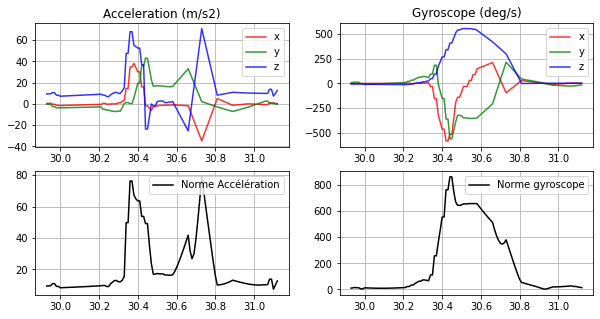

In [46]:
plt.figure(figsize=(10,5))
trick.dispRawData()

In [47]:
quaternion=Quaternion()
print(trick.gyroscope[:,100])
for i in range(trick.nb_row):
    quaternion.rotate(trick.gyroscope[:,i]*np.pi/180,trick.Te)

print(quaternion.q)
print(quaternion.get_rot_mat())

[0.2864789  0.2864789  2.29183118]
[-0.13503353 -0.19457585 -0.04603942  1.02408675]
[[-0.99477949  0.29448842 -0.38609138]
 [-0.25865578 -1.06625976 -0.14684524]
 [-0.41095884 -0.04174818  1.02700834]]


[0.2864789  0.2864789  2.29183118]
[-0.13503353 -0.19457585 -0.04603942  1.02408675]
[[-0.99477949  0.29448842 -0.38609138]
 [-0.25865578 -1.06625976 -0.14684524]
 [-0.41095884 -0.04174818  1.02700834]]
[[-0.89865315  0.26603176 -0.34878306]
 [-0.23366167 -0.96322622 -0.13265547]
 [-0.37124756 -0.03771402  0.9277677 ]]
(120, 3)
(120,)


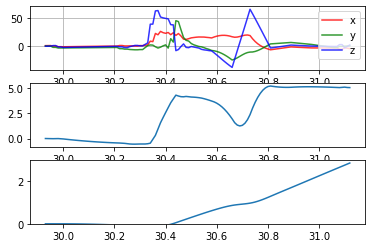

In [48]:
quaternion=Quaternion()
print(trick.gyroscope[:,100])
a_fixes=[]
for i in range(trick.nb_row):
    quaternion.rotate(trick.gyroscope[:,i]*np.pi/180,trick.Te)
    rot =quaternion.get_rot_mat()
    n=np.linalg.norm(rot,axis=1)
    rot[0,:]=rot[0,:]/n[0]
    rot[1,:]=rot[1,:]/n[1]
    rot[2,:]=rot[2,:]/n[2]
    a_fixe=np.matmul(rot.T, trick.acceleration[:,i])
    a_fixe[2]-=10
    a_fixes.append(a_fixe)
print(quaternion.q)
print(quaternion.get_rot_mat())

print(rot)
a_fixes=np.array(a_fixes)
vz_fixes=ifct.EulerIntegration(a_fixes[:,2],trick.Te)
posz_fixes=ifct.EulerIntegration(vz_fixes,trick.Te)

print(a_fixes.shape)
print(vz_fixes.shape)



df.plotVector(trick.time,a_fixes,"",311)
plt.subplot(312)
plt.plot(trick.time,vz_fixes[:])
plt.subplot(313)
plt.plot(trick.time,posz_fixes[:])
plt.ylim(ymin=0)
plt.show()

In [49]:
quaternion=Quaternion()
print(trick.gyroscope[:,100])
a_fixes=[]
for i in range(trick.nb_row):
    quaternion.rotate(trick.gyroscope[:,i]*np.pi/180,trick.Te)
    rot =quaternion.get_rot_mat()
    n=np.linalg.norm(rot,axis=1)
    rot[0,:]=rot[0,:]/n[0]
    rot[1,:]=rot[1,:]/n[1]
    rot[2,:]=rot[2,:]/n[2]
    a_fixe=np.matmul(rot.T, trick.gyroscope[:,i])
    a_fixe[2]-=10
    a_fixe = trick.gyroscope
    a_fixes.append(a_fixe)
print(quaternion.q)
print(quaternion.get_rot_mat())

print(rot)
# a_fixes=np.array(a_fixes)
vz_fixes=ifct.EulerIntegration(a_fixes[:,2],trick.Te)

print(a_fixes.shape)
print(vz_fixes.shape)



df.plotVect(trick.time,a_fixes,"",311)
plt.subplot(312)
plt.plot(trick.time,vz_fixes[:])
plt.ylim(ymin=-20,ymax=180)
plt.grid()
plt.show()

[0.2864789  0.2864789  2.29183118]
[-0.13503353 -0.19457585 -0.04603942  1.02408675]
[[-0.99477949  0.29448842 -0.38609138]
 [-0.25865578 -1.06625976 -0.14684524]
 [-0.41095884 -0.04174818  1.02700834]]
[[-0.89865315  0.26603176 -0.34878306]
 [-0.23366167 -0.96322622 -0.13265547]
 [-0.37124756 -0.03771402  0.9277677 ]]


TypeError: list indices must be integers or slices, not tuple